## Assignment 1 

#### 1.1 Overview 

**Load in Python Modules**: All modules required to run any data processing will be all loaded at the start. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from typing import Any, Union
from collections import Counter
import scipy.stats as s

%matplotlib inline
plt.style.use('seaborn-v0_8')
# print(plt.style.available)

#### Helper Functions

Helper Functions used to avoid repeating code where possible, and to assist presenting data in a clean format.

In [48]:
class DataLoad:
    def __init__(self, path: str = './data/'):
        self._path = path
        self._datasets = {}
        
    def loadData(self, df_name: str = None):
        df = pd.read_csv(os.path.join(self._path, df_name))
        df.name = os.path.splitext(df_name)[0]
        
        # Inconsistent spacing and leading/trailing spaces captured in column names. 
        df.columns = df.columns.str.strip() 
        self._datasets[df.name] = df
        return df
    
    def printSummary(self, df_name: str):
        if df_name not in self._datasets:
            print(f"{df_name} doesn't exist! Try loading data again. ")
            return
        
        print(f"{df_name}")
        print('----------')
        print(f"Number of Examples in {df_name}: {self._datasets[df_name].shape[0]}")
        print(f'Number of Features in {df_name}: {self._datasets[df_name].shape[1]}')
        print(f"Arrhythmia Shape: {self._datasets[df_name].shape}")
        print(self._datasets[df_name].columns)
        print('\n')
    
    def printSummaryStats(self, df: str, types: str | list = None) -> pd.DataFrame:
        return self._datasets[df].describe(include=types)
    
    def getDataLabels(self):
        return list(self._datasets)

    def getAllData(self):
        return self._datasets.values()

class EDA:
    def __init__(self):
        pass
    
    def checkMissing(self, df: pd.DataFrame = None) -> bool:
        if not len(df): 
            return 0
        
        tmp = df.replace('?', np.NaN)
        return (tmp.isna().any().sum() > 0)

    def getMissingRecords(self, df: pd.DataFrame = None) -> list:
        tmp = df.replace('?', np.NaN)
        return df.loc[:, tmp.isna().any()]
    
    def displayMissingSummary(self, df: pd.DataFrame = None) -> pd.DataFrame:
        placeholder_char = '?'
        missing_vals = df.apply(lambda x: x == placeholder_char).sum()
        missing_prop = (missing_vals / len(df)) * 100
        missing_summary = pd.concat([missing_vals, missing_prop], axis=1)
        missing_summary.columns = ['Missing Values', 'Missing Proportion']
        return missing_summary[missing_vals > 0]
    
    def plotBarMissing(self, df: pd.DataFrame = None) -> pd.DataFrame:
        placeholder_char = '?'
        missing_vals = df.apply(lambda x: x == placeholder_char).sum()
        missing_vals = missing_vals[missing_vals > 0]
        
        plt.figure(figsize=(10, 6))
        plt.bar(missing_vals.index, missing_vals)
        plt.xlabel('Variables')
        plt.ylabel('Number of Missing Values')
        plt.title('Count of Missing Values')
        plt.show()
        
    def plot_continuous_distribution(self, df: pd.DataFrame = None, column: str = None, height: int = 8):
        sns.displot(df, x=column, kde=True, aspect=height/5, linewidth=1, edgecolor='black')
        plt.grid(axis='y', linestyle='--')
    
    def get_unique_values(self, df: pd.DataFrame = None, column: str = None):
        n_unique = len(df[column].unique())
        uniqueArr = df[column].value_counts()
        print(f"Column: {column} has {n_unique} unique values. \n")
        print(uniqueArr)
    
    def plot_categorical_distribution(self, df: pd.DataFrame = None, column: str = None, height: int = 8):
        sns.catplot(data=df, x=column, height=8, aspect=height/5, kind='count')
        

#### Loading Input Data

There is no missing data in BCP or Website Phishing datasets. However, there is missing data in Arrhythmia. 

In [49]:
load = DataLoad()
eda = EDA()

dfA = load.loadData('Arrhythmia.csv')
dfB = load.loadData('BCP.csv')
dfC = load.loadData('Website_Phishing.csv')

In [50]:
load.printSummary('Arrhythmia')
load.printSummary('BCP')
load.printSummary('Website_Phishing')

Arrhythmia
----------
Number of Examples in Arrhythmia: 452
Number of Features in Arrhythmia: 280
Arrhythmia Shape: (452, 280)
Index(['age', 'sex', 'height', 'weight', 'QRSduration', 'PRinterval',
       'Q-Tinterval', 'Tinterval', 'Pinterval', 'QRS',
       ...
       'chV6_QwaveAmp', 'chV6_RwaveAmp', 'chV6_SwaveAmp', 'chV6_RPwaveAmp',
       'chV6_SPwaveAmp', 'chV6_PwaveAmp', 'chV6_TwaveAmp', 'chV6_QRSA',
       'chV6_QRSTA', 'class'],
      dtype='object', length=280)


BCP
----------
Number of Examples in BCP: 683
Number of Features in BCP: 11
Arrhythmia Shape: (683, 11)
Index(['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')


Website_Phishing
----------
Number of Examples in Website_Phishing: 11055
Number of Features in Website_Phishing: 31
Arrhythmia Shape: (11055, 3

In [6]:
print(f"Arrhythmia: {eda.checkMissing(dfA)}")
print(f"BCP: {eda.checkMissing(dfB)}")
print(f"Website_Phishing: {eda.checkMissing(dfC)}")

Arrhythmia: True
BCP: False
Website_Phishing: False


#### 1.1.1 Initial Exploration of `Arrhythmia` Data

There is missing data.

In [7]:
dfA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 280 entries, age to class
dtypes: float64(120), int64(155), object(5)
memory usage: 988.9+ KB


In [8]:
load.printSummaryStats('Arrhythmia', 'int64')

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,...,chV6_RPwave,chV6_SPwave,chV6_intrinsicReflecttions,chV6_RRwaveExists,chV6_DD_RRwaveExists,chV6_RPwaveExists,chV6_DD_RPwaveExists,chV6_RTwaveExists,chV6_DD_RTwaveExists,class
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.0,452.0,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,...,0.150442,0.0,32.168142,0.002212,0.002212,0.004425,0.0,0.0,0.011062,3.880531
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,...,1.868024,0.0,10.272045,0.047036,0.047036,0.066445,0.0,0.0,0.104708,4.407097
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,...,0.000000,0.0,24.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,0.000000,0.0,28.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.000000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,...,0.000000,0.0,40.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,6.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,28.000000,0.0,104.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000,16.000000


In [9]:
load.printSummaryStats('Arrhythmia', 'object')

,T,P,QRST,J,heartrate
count,452,452,452,452,452
unique,171,102,135,70,64
top,52,60,62,?,63
freq,13,23,9,376,21


#### 1.1.2 Missing Values in `Arrhythmia`

Checking for null values suggests no missing values.

Further inspection shows that missing values take the form of placeholder values ie. '?'

In [10]:
eda.getMissingRecords(dfA)

,T,P,QRST,J,heartrate
0,13,64,-2,?,63
1,37,-17,31,?,53
2,34,70,66,23,75
3,11,-5,20,?,71
4,13,61,3,?,?
...,...,...,...,...,...
447,4,40,-27,?,63
448,66,52,79,?,73
449,-19,-61,-70,84,84
450,29,-22,43,103,80


In [11]:
# no need to check for BCP or Website Phishing since no missing values found
eda.displayMissingSummary(dfA)

,Missing Values,Missing Proportion
T,8,1.769912
P,22,4.867257
QRST,1,0.221239
J,376,83.185841
heartrate,1,0.221239


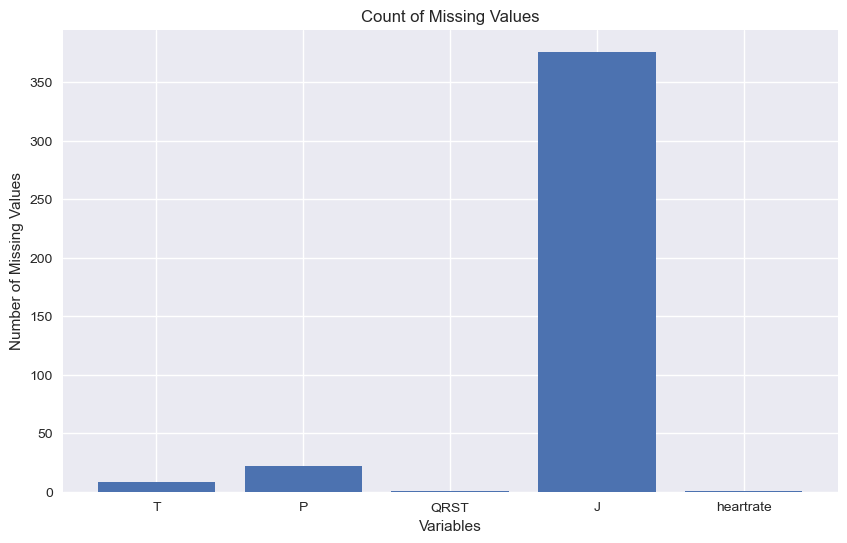

In [12]:
eda.plotBarMissing(dfA)

#### 1.1.3 Determining `Arrhythmia` Imputation Strategy

Missing values are an issue as they introduce bias and can lead to misleading and/or incorrect results.

The relationship of missingness can be seen below categorised by the target feature, `class`. From these plots, we can determine the data is **Missing Completely at Random (MCAR)**.

A correlation close to 1 indicates a strong positive / correlation. 

The approach to imputing is as below:

- The feature `J` has high missingness (~83%), imputation becomes less reliable, and the imputed values might dominate the feature. Without domain knowledge, we cannot justify the imputation, so feature `J` will be dropped.
- Features `QRST`, `heartrate` and `T` have extremely low missingness (~0.5-1%), we can impute with zero values. The impact on overall dataset may be minimal.
- Feature `P` can be imputed using either A) zeros or B) median imputation (due to a skewed distribution). I will start with median imputation to first determine the impact on performance after model fitting, and appropriately adjust imputing strategy should performance not be as expected.

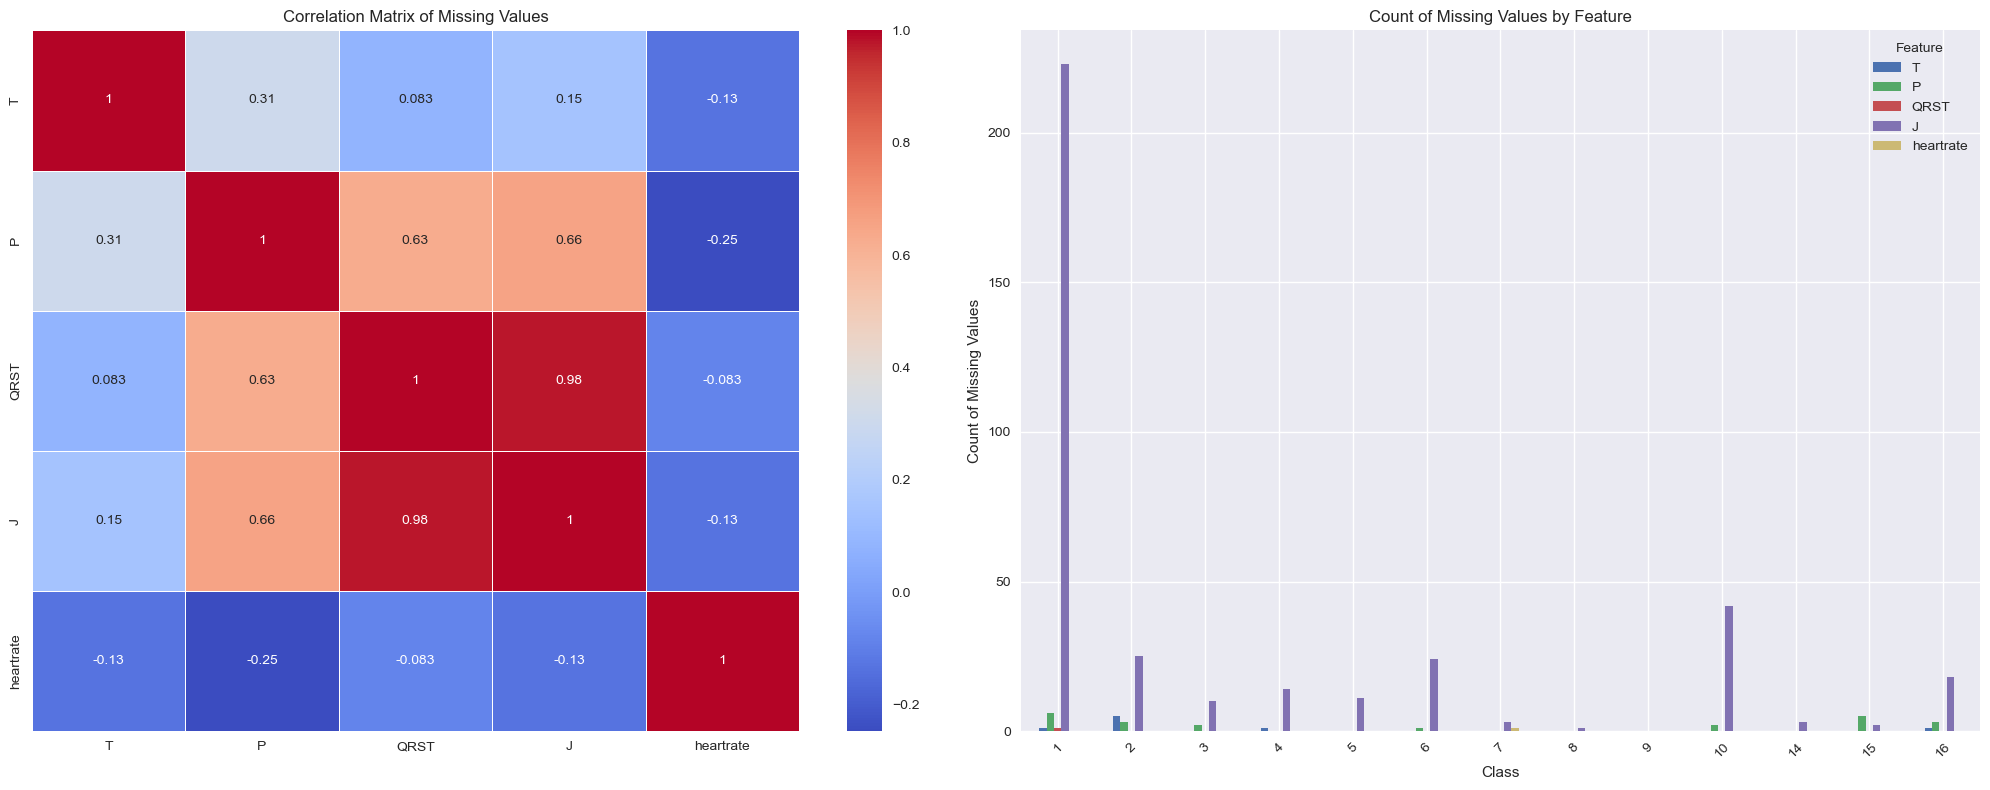

In [13]:
missing_keys = eda.displayMissingSummary(dfA).index
tmp = dfA.replace('?', np.NaN)
missing_sets = {}
for key in missing_keys:
    missing_sets[key] = tmp.groupby('class', group_keys=True)[key].apply(lambda x: x.isnull().sum())

df = pd.DataFrame(missing_sets)
correlation_matrix = df.corr(numeric_only=True)

fig, ax = plt.subplots(1, 2, figsize=(20, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, ax=ax[0])
ax[0].set_title('Correlation Matrix of Missing Values')

df.plot(kind='bar', ax=ax[1])
ax[1].set_title('Count of Missing Values by Feature')
ax[1].set_xlabel('Class')
ax[1].set_ylabel('Count of Missing Values')
ax[1].tick_params(axis='x', rotation=45)
ax[1].legend(title='Feature')

plt.tight_layout()
plt.show()

#### 1.1.4 Imputing Missing Values in `Arrhythmia`

- `J` feature dropped due to high missingness.
- `QRST`, `heartrate`, `T` features imputed with zeros due to very low missingness.
- `P` feature imputed with median value due to skewed distribution.

In [14]:
dfA = dfA.replace('?', np.NaN)

# Dropping 'J' feature
dfA=dfA.drop('J', axis=1)

# Zeros Imputation
cols_impute = ['QRST', 'heartrate', 'T']
dfA[cols_impute] = dfA[cols_impute].fillna(0)

# Median Imputation
col = 'P'
median_value = dfA[col].median()
dfA[col] = dfA[col].fillna(median_value)

In [15]:
for col in ['QRST', 'heartrate', 'T', 'P']:
    dfA[col] = pd.to_numeric(dfA[col], errors='coerce') 

In [16]:
cnt = dfA.isnull().sum()
cnt[cnt > 0]

Series([], dtype: int64)

#### 1.1.5 Initial Exploration of `BCP`

No missing values.

In [17]:
load.printSummary('BCP')

BCP
----------
Number of Examples in BCP: 683
Number of Features in BCP: 11
Arrhythmia Shape: (683, 11)
Index(['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')




In [18]:
dfB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           683 non-null    int64
 1   Clump Thickness              683 non-null    int64
 2   Uniformity of Cell Size      683 non-null    int64
 3   Uniformity of Cell Shape     683 non-null    int64
 4   Marginal Adhesion            683 non-null    int64
 5   Single Epithelial Cell Size  683 non-null    int64
 6   Bare Nuclei                  683 non-null    int64
 7   Bland Chromatin              683 non-null    int64
 8   Normal Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int64(11)
memory usage: 58.8 KB


In [19]:
dfB.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [20]:
dfB.isnull().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

#### 1.1.6 Initial Exploration of `Website Phishing`

No missing values.

In [21]:
load.printSummary('Website_Phishing')

Website_Phishing
----------
Number of Examples in Website_Phishing: 11055
Number of Features in Website_Phishing: 31
Arrhythmia Shape: (11055, 31)
Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Class'],
      dtype='object')




In [22]:
dfC.isna().any().sum()

0

In [23]:
dfC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            11055 non-null  int64
 1   URL_Length                   11055 non-null  int64
 2   Shortining_Service           11055 non-null  int64
 3   having_At_Symbol             11055 non-null  int64
 4   double_slash_redirecting     11055 non-null  int64
 5   Prefix_Suffix                11055 non-null  int64
 6   having_Sub_Domain            11055 non-null  int64
 7   SSLfinal_State               11055 non-null  int64
 8   Domain_registeration_length  11055 non-null  int64
 9   Favicon                      11055 non-null  int64
 10  port                         11055 non-null  int64
 11  HTTPS_token                  11055 non-null  int64
 12  Request_URL                  11055 non-null  int64
 13  URL_of_Anchor                11055 non-null  i

In [24]:
dfC.describe()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Class
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,0.628584,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,0.777777,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 2. Implementation

1. At each split, the datasets get split into two or more homogenous sets.



### 2.1.1 Naive Approach
- The entire feature space is used in decision tree building.
- Use the `median` to split the data into classes.
<!-- - Determine a threshold value to split the data into classes. -->


### 2.1.2 Optimised Approach
- Rather than use the entire feature space for decision tree building, we can compute the correlation for each feature against the target feature to identify potentially good candidates.

#### 2.1 Implementation of Decision Stump

A decision stump is a Decision Tree that is one layer deep, makes simple predictions. 

In [25]:
class DecisionInterface:
    '''
    Defines an Informal Interface to be used for all Decision Tree Classifiers
    Provides blueprint for concrete class implementation
    '''
    def fit(self, X: np.ndarray, y: np.ndarray) -> pd.DataFrame:
        pass
    
    def predict(self, X: np.ndarray) -> np.ndarray:
        pass

In [26]:
classes, counts = np.unique(dfA['weight'], axis=0, return_counts=True)
counts / counts.sum()

array([0.00221239, 0.00442478, 0.00221239, 0.00221239, 0.00221239,
       0.00221239, 0.00221239, 0.00442478, 0.00221239, 0.00221239,
       0.00442478, 0.00221239, 0.00221239, 0.00442478, 0.00442478,
       0.00221239, 0.00221239, 0.00884956, 0.00221239, 0.00442478,
       0.01327434, 0.00884956, 0.01106195, 0.01769912, 0.0199115 ,
       0.0199115 , 0.03318584, 0.0199115 , 0.00884956, 0.02212389,
       0.01769912, 0.04646018, 0.01548673, 0.02212389, 0.02654867,
       0.02212389, 0.05752212, 0.01548673, 0.0199115 , 0.02876106,
       0.00663717, 0.06415929, 0.01106195, 0.02654867, 0.0199115 ,
       0.03097345, 0.03318584, 0.01327434, 0.01106195, 0.0199115 ,
       0.01106195, 0.06415929, 0.00442478, 0.0199115 , 0.01106195,
       0.01106195, 0.02654867, 0.00663717, 0.00221239, 0.00884956,
       0.00442478, 0.0199115 , 0.00221239, 0.00221239, 0.01106195,
       0.01769912, 0.00221239, 0.00442478, 0.00221239, 0.00221239,
       0.00442478, 0.00442478, 0.00221239, 0.00221239, 0.00221

In [83]:
class Node:
    def __init__(self, feature_idx: int = None, threshold: Union[int, float, str] = None, left = None, right = None, info_gain: float = None, value: Any = None):
        
        ## for decision node
        self.feature_idx = feature_idx
        self.threshold = threshold
        self.left = left                     
        self.right = right
        self.info_gain = info_gain     
        
        ## for leaf nodes - majority class
        self.value = value             

class DecisionTree(DecisionInterface):
    def __init__(self, max_depth=2, min_samples_split=2):
        self.root = None
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
    
    def fit(self, X, y):
        X['Target'] = y
        
        self.root = self.constructTree(X, depth=0)
    
    def constructTree(self, df, depth):
        X = df.iloc[:, :-1]
        y = df.iloc[:, -1]
        
        n, _ = X.shape
        
        if n > self.min_samples_split and depth < self.max_depth:
            best_split = self.getBestSplit(df)
            
            # recursive splitting
            if best_split['info_gain'] > 0:
                left = self.constructTree(best_split['df_left'], depth+1)
                right = self.constructTree(best_split['df_right'], depth+1)
                return Node(
                    feature_idx=best_split['feature_idx'],
                    threshold=best_split['threshold'],
                    left=left,
                    right=right,
                    info_gain=best_split['info_gain']
                )

        # return leaf node once splitting completed, or max depth reached.
        return Node(value=y.mode()[0])

    def getBestSplit(self, df):
        max_info_gain = float('-inf')
        best_split = {}
        
        X = df.iloc[:, :-1]

        for i, feature in enumerate(X):            
            values = X[feature].unique()
            thresholds = np.sort(values)
            
            for threshold in thresholds:
                
                # determines left / right splits
                left, right = self.split(df, feature, threshold)
                
                # updating best split only if children aren't null
                if len(left) > 0 and len(right) > 0:
                    # select target feature vector from left / right
                    y = df.iloc[:, -1]
                    y_left = left.iloc[:, -1]
                    y_right = right.iloc[:, -1]
                    
                    # determine best split via information gain
                    curr_info_gain = self.calc_info_gain(y, y_left, y_right)
                    
                    # selecting the split with higher info gain = bigger drop in entropy
                    # goal: minimise entropy / maximise info gain
                    if curr_info_gain > max_info_gain:
                        best_split['feature_idx'] = i
                        best_split['threshold'] = threshold 
                        best_split['df_left'] = left
                        best_split['df_right'] = right
                        best_split['info_gain'] = curr_info_gain
                        max_info_gain = curr_info_gain
                
        return best_split
                

    def split(self, df: pd.DataFrame, feature: str, threshold: int):
        left = df[df[feature] <= threshold]
        right = df[df[feature] > threshold]
        
        return left, right
    
    def calc_info_gain(self, parent, left_child, right_child):
        ## Information Gain = E(parent) - [ (weighted) average E(children) ]
        
        left_weight = len(left_child) / len(parent)
        right_weight = len(right_child) / len(parent)
        
        gain = self.calc_entropy(parent) - left_weight * self.calc_entropy(left_child) - right_weight * self.calc_entropy(right_child)
        
        return gain
        
    def calc_entropy(self, y):
        ## Entropy = sum[ -pi log2(pi) ]
                
        labels = np.unique(y)
        freqs = Counter(y)
        entropy = 0
        
        for cls in labels:
            p = freqs[cls] / len(y)
            entropy += -p * np.log2(p)
        
        return entropy

    def print_tree(self, node=None, depth=0, prefix="", feature_names=None):
        if node is None:
            return

        # Leaf node
        if node.value is not None:
            print(f"{prefix}Predict: {node.value}")
        else:
            # Ensure that feature_idx is within the bounds of feature_names
            if 0 <= node.feature_idx < len(feature_names):
                feature_name = feature_names[node.feature_idx]
                print(f"{prefix}{feature_name} <= {node.threshold}? Info Gain: {node.info_gain:.4f}")
            
            # Prepare the prefix for child nodes
            child_prefix = prefix + "  |"
            
            # Print child nodes
            print(f"{child_prefix}---> True:")
            self.print_tree(node.left, feature_names=feature_names, depth=depth + 1, prefix=child_prefix + "  ")
            
            print(f"{child_prefix}---> False:")
            self.print_tree(node.right, feature_names=feature_names, depth=depth + 1, prefix=child_prefix + "  ")  

In [80]:
class DecisionTreeUnpruned(DecisionInterface):
    def __init__(self, min_samples_split=2):
        self.root = None
        self.min_samples_split = min_samples_split
    
    def fit(self, X, y):
        X['Target'] = y
        
        self.root = self.constructTree(X, 0)
    
    def constructTree(self, df, depth):
        y = df.iloc[:, -1]
        
        n = len(df) # num of examples
        
        if len(y.unique()) == 1 or n < self.min_samples_split:
            value = y.mode()[0]
            return Node(value=value)
        else:
            best_split = self.getBestSplit(df)
            
            # recursive splitting
            if best_split['info_gain'] > 0:
                left = self.constructTree(best_split['df_left'], depth+1)
                right = self.constructTree(best_split['df_right'], depth+1)
                return Node(
                    feature_idx=best_split['feature_idx'],
                    threshold=best_split['threshold'],
                    left=left,
                    right=right,
                    info_gain=best_split['info_gain']
                )
            else:
                # return leaf node once splitting completed, or max depth reached.
                return Node(value=y.mode()[0])

    def getBestSplit(self, df):
        max_info_gain = float('-inf')
        best_split = {}
        
        X = df.iloc[:, :-1]

        for i, feature in enumerate(X):            
            values = X[feature].unique()
            thresholds = np.sort(values)
            
            for threshold in thresholds:
                
                # determines left / right splits
                left, right = self.split(df, feature, threshold)
                
                # updating best split only if children aren't null
                if len(left) > 0 and len(right) > 0:
                    # select target feature vector from left / right
                    y = df.iloc[:, -1]
                    y_left = left.iloc[:, -1]
                    y_right = right.iloc[:, -1]
                    
                    # determine best split via information gain
                    curr_info_gain = self.calc_info_gain(y, y_left, y_right)
                    
                    # selecting the split with higher info gain = bigger drop in entropy
                    # goal: minimise entropy / maximise info gain
                    if curr_info_gain > max_info_gain:
                        best_split['feature_idx'] = i
                        best_split['threshold'] = threshold 
                        best_split['df_left'] = left
                        best_split['df_right'] = right
                        best_split['info_gain'] = curr_info_gain
                        max_info_gain = curr_info_gain
                
        return best_split

    def split(self, df: pd.DataFrame, feature: str, threshold: int):
        left = df[df[feature] <= threshold]
        right = df[df[feature] > threshold]
        
        return left, right
    
    def calc_info_gain(self, parent, left_child, right_child):
        ## Information Gain = E(parent) - [ (weighted) average E(children) ]
        
        left_weight = len(left_child) / len(parent)
        right_weight = len(right_child) / len(parent)
        
        gain = self.calc_entropy(parent) - left_weight * self.calc_entropy(left_child) - right_weight * self.calc_entropy(right_child)
        
        return gain
        
    def calc_entropy(self, y):
        ## Entropy = sum[ -pi log2(pi) ]
                
        labels = np.unique(y)
        freqs = Counter(y)
        entropy = 0
        
        for cls in labels:
            p = freqs[cls] / len(y)
            entropy += -p * np.log2(p)
        
        return entropy

    def print_tree(self, node=None, depth=0, prefix="", feature_names=None):
        if node is None:
            return

        # Leaf node
        if node.value is not None:
            print(f"{prefix}Predict: {node.value}")
        else:
            # Ensure that feature_idx is within the bounds of feature_names
            if 0 <= node.feature_idx < len(feature_names):
                feature_name = feature_names[node.feature_idx]
                print(f"{prefix}{feature_name} <= {node.threshold}? Info Gain: {node.info_gain:.4f}")
            
            # Prepare the prefix for child nodes
            child_prefix = prefix + "  |"
            
            # Print child nodes
            print(f"{child_prefix}---> True:")
            self.print_tree(node.left, feature_names=feature_names, depth=depth + 1, prefix=child_prefix + "  ")
            
            print(f"{child_prefix}---> False:")
            self.print_tree(node.right, feature_names=feature_names, depth=depth + 1, prefix=child_prefix + "  ")    
    
    def prune_node(self):
    

### Train Test Split

Partitioning w/ a 80-20 split for training and testing.

In [51]:
from sklearn.model_selection import train_test_split

X = dfA.iloc[:, :-1]
y = dfA.iloc[:, -1].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Decision Stump

In [84]:
clf = DecisionTree(max_depth=1)
clf.fit(X_train, y_train)
clf.print_tree(clf.root, feature_names=X_train.columns)

chV6_TwaveAmp <= 0.3? Info Gain: 0.2749
  |---> True:
  |  Predict: 2
  |---> False:
  |  Predict: 1


### Unpruned Decision Tree

In [81]:
clf = DecisionTreeUnpruned()
clf.fit(X_train, y_train)
clf.print_tree(clf.root, feature_names=X_train.columns)

chV6_TwaveAmp <= 0.3? Info Gain: 0.2749
  |---> True:
  |  chV3_QRSA <= -29.0? Info Gain: 0.5176
  |    |---> True:
  |    |  chAVR_JJwaveAmp <= 0.3? Info Gain: 0.9911
  |    |    |---> True:
  |    |    |  heartrate <= 64? Info Gain: 1.0000
  |    |    |    |---> True:
  |    |    |    |  weight <= 65? Info Gain: 1.0000
  |    |    |    |    |---> True:
  |    |    |    |    |  age <= 3? Info Gain: 1.0000
  |    |    |    |    |    |---> True:
  |    |    |    |    |    |  Predict: 5
  |    |    |    |    |    |---> False:
  |    |    |    |    |    |  Predict: 7
  |    |    |    |    |---> False:
  |    |    |    |    |  Predict: 3
  |    |    |    |---> False:
  |    |    |    |  Predict: 16
  |    |    |---> False:
  |    |    |  age <= 43? Info Gain: 0.8813
  |    |    |    |---> True:
  |    |    |    |  sex <= 0? Info Gain: 0.9183
  |    |    |    |    |---> True:
  |    |    |    |    |  Predict: 2
  |    |    |    |    |---> False:
  |    |    |    |    |  Predict: 14
  |    |

In [61]:
X_train.columns[14]

'heartrate'